# <font color=#025dfa> Derin Öğrenme Clustering ile ML Ticaret Botları: Güçlü Stratejiler Oluşturma - ML Trading Bots with Deep Learning Clustering: Building Powerful Strategies

TR = Her yorum satırı kendisini üstündeki koda aittir. İlk olarak Türkçe, son olarak İngilizce yazıldı.

EN = Each comment line belongs to the code above it. It was first written in Turkish and lastly in English.

TR = Bu proje, finansal piyasalarda etkin ticaret stratejileri geliştirmek amacıyla derin öğrenme ve kümeleme (clustering) tekniklerini kullanan makine öğrenimi tabanlı ticaret botları oluşturmayı hedeflemektedir. Fiyat, hacim, volatilite ve piyasa göstergeleri gibi çeşitli finansal veriler üzerinde kümeleme algoritmaları uygulanarak, farklı piyasa koşullarını tanımlayan veri grupları oluşturulacaktır. Proje, bu veri kümeleri üzerinden derin öğrenme modelleri ile en uygun ticaret stratejilerini belirleyerek, yatırımcılara daha karlı ve dinamik bir ticaret deneyimi sunmayı amaçlamaktadır.

EN = This project aims to create machine learning-based trading bots that use deep learning and clustering techniques to develop effective trading strategies in financial markets. Clustering algorithms will be applied to various financial data such as price, volume, volatility and market indicators to create data groups that define different market conditions. The project aims to provide investors with a more profitable and dynamic trading experience by determining the most appropriate trading strategies using deep learning models on these data sets.

Kaynak/Source = https://www.kaggle.com/competitions/tradingbot/overview

Veri/Data = https://www.kaggle.com/datasets/prasoonkottarathil/btcinusd

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import math
import nltk
import warnings
warnings.filterwarnings('ignore')
import pickle

from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
pd.set_option("display.max_columns",None) 
# TR = En fazla kaç sütun olduğunu gösteriyor. 
# EN = It shows the maximum number of columns.

In [3]:
df=pd.read_csv('BTC-Hourly.csv')

## <font color=#FFD700> EDA Keşif Amaçlı Veri Analizi - EDA - Exploratory Data Analysis 

In [4]:
df.head()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
0,1646092800,2022-03-01 00:00:00,BTC/USD,43221.71,43626.49,43185.48,43312.27,52.056320,2.254677e+06
1,1646089200,2022-02-28 23:00:00,BTC/USD,43085.30,43364.81,42892.37,43178.98,106.816103,4.612210e+06
2,1646085600,2022-02-28 22:00:00,BTC/USD,41657.23,44256.08,41650.29,42907.32,527.540571,2.263535e+07
3,1646082000,2022-02-28 21:00:00,BTC/USD,41917.09,41917.09,41542.60,41659.53,69.751680,2.905822e+06
4,1646078400,2022-02-28 20:00:00,BTC/USD,41361.99,41971.00,41284.11,41914.97,247.151654,1.035935e+07


In [5]:
df.sample(5)

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
30868,1534968000,2018-08-22 20:00:00,BTC/USD,6435.00,6435.00,6279.00,6326.38,7.466705e+06,1.179190e+03
10067,1609851600,2021-01-05 13:00:00,BTC/USD,31639.12,31939.12,31479.42,31498.00,3.770644e+02,1.187677e+07
19259,1576760400,2019-12-19 13:00:00,BTC/USD,7188.28,7227.92,7055.77,7078.29,2.223792e+06,3.115100e+02
23396,1561867200,2019-06-30 04:00:00,BTC/USD,12126.26,12145.30,12009.31,12028.03,2.431937e+06,2.015600e+02
27011,1548853200,2019-01-30 13:00:00,BTC/USD,3442.94,3459.62,3435.20,3440.05,9.880732e+05,2.867300e+02


In [6]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
33254,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69
33255,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62
33256,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79
33257,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58
33258,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93


In [7]:
df.tail()

,unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
33254,1526378400,2018-05-15 10:00:00,BTC/USD,8708.32,8865.00,8695.11,8795.90,11101273.74,1260.69
33255,1526374800,2018-05-15 09:00:00,BTC/USD,8728.49,8754.40,8701.35,8708.32,1593991.98,182.62
33256,1526371200,2018-05-15 08:00:00,BTC/USD,8739.00,8750.27,8660.53,8728.49,7986062.84,917.79
33257,1526367600,2018-05-15 07:00:00,BTC/USD,8740.99,8766.00,8721.11,8739.00,2390398.89,273.58
33258,1526364000,2018-05-15 06:00:00,BTC/USD,8733.86,8796.68,8707.28,8740.99,4906603.14,559.93


In [8]:
df.shape

(33259, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33259 entries, 0 to 33258
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   unix        33259 non-null  int64  
 1   date        33259 non-null  object 
 2   symbol      33259 non-null  object 
 3   open        33259 non-null  float64
 4   high        33259 non-null  float64
 5   low         33259 non-null  float64
 6   close       33259 non-null  float64
 7   Volume BTC  33259 non-null  float64
 8   Volume USD  33259 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 2.3+ MB


In [10]:
df.isnull().sum().sort_values(ascending=False)

unix          0
date          0
symbol        0
open          0
high          0
low           0
close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [11]:
df.describe()

,unix,open,high,low,close,Volume BTC,Volume USD
count,3.325900e+04,33259.000000,33259.000000,33259.000000,33259.000000,3.325900e+04,3.325900e+04
mean,1.586228e+09,20119.546772,20232.957473,19997.069777,20120.684800,1.612380e+06,2.965701e+06
std,3.456429e+07,18537.219607,18646.950933,18418.320297,18537.695044,3.102328e+06,7.329787e+06
min,1.526364e+09,3139.760000,3158.340000,3122.280000,3139.760000,0.000000e+00,0.000000e+00
25%,1.556296e+09,7022.865000,7055.835000,6970.570000,7022.865000,1.903241e+02,1.682800e+02
50%,1.586228e+09,9700.040000,9740.270000,9657.000000,9700.320000,6.093271e+05,5.248300e+02
75%,1.616161e+09,36415.305000,36735.380000,36104.235000,36423.040000,1.929240e+06,3.120014e+06
max,1.646093e+09,68635.050000,69000.000000,68447.000000,68627.010000,6.857061e+07,2.582324e+08


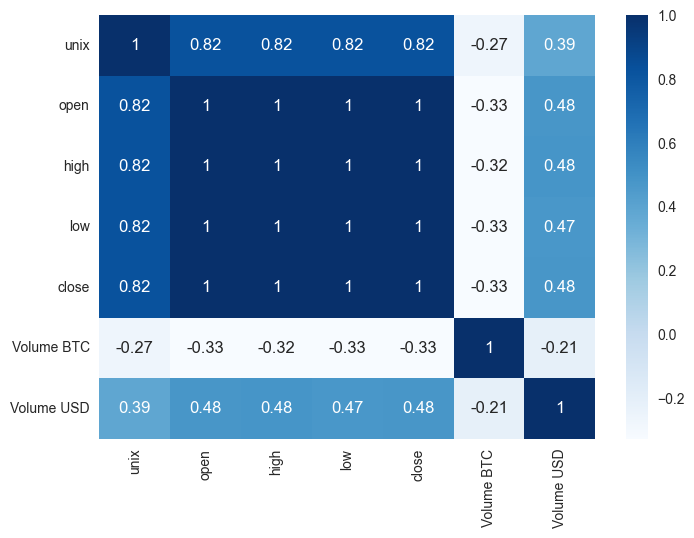

In [12]:
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Blues');

In [13]:
abs(df.corr(numeric_only=True)['Volume BTC']).sort_values(ascending=False)

Volume BTC    1.000000
low           0.326909
close         0.325917
open          0.325680
high          0.324982
unix          0.266131
Volume USD    0.210158
Name: Volume BTC, dtype: float64

## <font color=#C0C0C0> Gereksiz Verileri Silme İşlemi Yapıyoruz - We Delete Unnecessary Data

In [14]:
df=df.drop(['unix', 'symbol'],axis=1)
df.head(1)

,date,open,high,low,close,Volume BTC,Volume USD
0,2022-03-01 00:00:00,43221.71,43626.49,43185.48,43312.27,52.05632,2.254677e+06


## <font color=#1cfc03> Aykırı Değer - Outlier

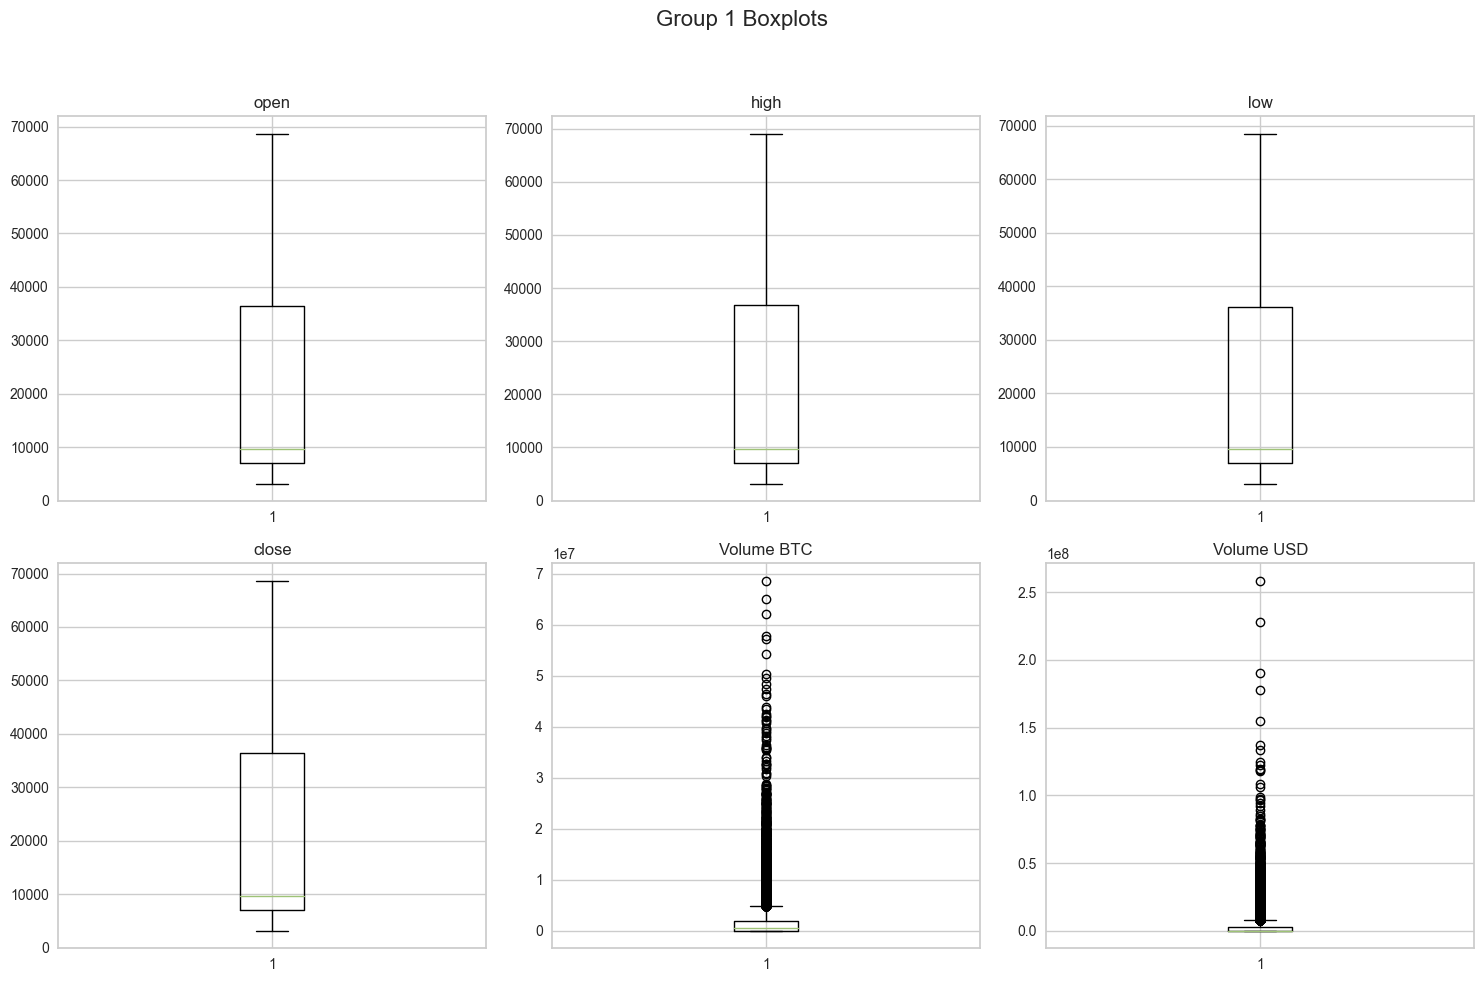

In [15]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
# TR = Veri setindeki tüm sayısal sütunları seçer
# EN = Selects all numeric columns in the dataset

num_cols = len(numeric_cols)
# TR = Sayısal sütunların toplam sayısını hesaplar
# EN = Calculates the total number of numeric columns

num_plots_per_group = 9
# TR = Her grup için çizilecek maksimum grafik sayısını belirler
# EN = Sets the maximum number of plots per group

num_groups = math.ceil(num_cols / num_plots_per_group)
# TR = Toplam grup sayısını belirler (sütunları 9'luk gruplar halinde ayırır)
# EN = Determines the total number of groups (splits columns into groups of 9)

for group in range(num_groups):
    cols_in_group = numeric_cols[group * num_plots_per_group:(group + 1) * num_plots_per_group]
    # TR = O andaki grup için sütunları seçer
    # EN = Selects columns for the current group

    num_plots = len(cols_in_group)
    # TR = O andaki grup içindeki sütun sayısını hesaplar
    # EN = Calculates the number of columns in the current group

    rows = math.ceil(num_plots / 3)
    # TR = 3 sütun olacak şekilde kaç satır gerektiğini belirler
    # EN = Determines the number of rows needed for a 3-column grid

    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    # TR = Grafikler için alt grafikler (subplots) oluşturur
    # EN = Creates subplots for the plots

    axs = axs.flatten() if num_plots > 1 else [axs]
    # TR = Kolay indeksleme için axs dizisini düzleştirir
    # EN = Flattens the axs array for easy indexing

    for i, col in enumerate(cols_in_group):
        axs[i].boxplot(df[col].dropna())
        # TR = O andaki sütunun kutu grafiğini çizdirir
        # EN = Draws a boxplot for the current column

        axs[i].set_title(col)
        # TR = Grafiğe sütun adını başlık olarak ekler
        # EN = Sets the column name as the title of the plot

    for i in range(num_plots, len(axs)):
        axs[i].set_visible(False)
        # TR = Kullanılmayan alt grafikleri gizler
        # EN = Hides unused subplots

    plt.suptitle(f'Group {group + 1} Boxplots', fontsize=16)
    # TR = Grup için genel bir başlık ekler
    # EN = Adds a general title for the group

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    # TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar
    # EN = Adjusts the layout for a tidy appearance

In [16]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns  
# TR = Veri setindeki sayısal sütunları (float64 ve int64 türündeki sütunları) seçer  
# EN = Selects numeric columns from the dataset (float64 and int64 types)

for col in numeric_cols:  
    # TR = Her bir sayısal sütun için döngü başlatır  
    # EN = Loops through each numeric column

    percentile_94 = df[col].quantile(0.94)  
    # TR = Sütundaki 94. yüzdelik dilim değerini hesaplar  
    # EN = Calculates the 94th percentile value for the column

    outlier_count = (df[col] > percentile_94).sum()  
    # TR = 94. yüzdelik dilimden büyük olan değerlerin sayısını bulur  
    # EN = Counts how many values are greater than the 94th percentile

    total_rows = len(df)  
    # TR = Veri setindeki toplam satır sayısını alır  
    # EN = Gets the total number of rows in the dataset

    if outlier_count < total_rows:  
        # TR = Eğer aykırı değer sayısı toplam satır sayısından azsa  
        # EN = If the outlier count is less than the total number of rows

        df = df[df[col] <= percentile_94]  
        # TR = 94. yüzdelik dilimden küçük veya eşit olan değerleri tutarak veri setini filtreler  
        # EN = Filters the dataset to keep only values less than or equal to the 94th percentile

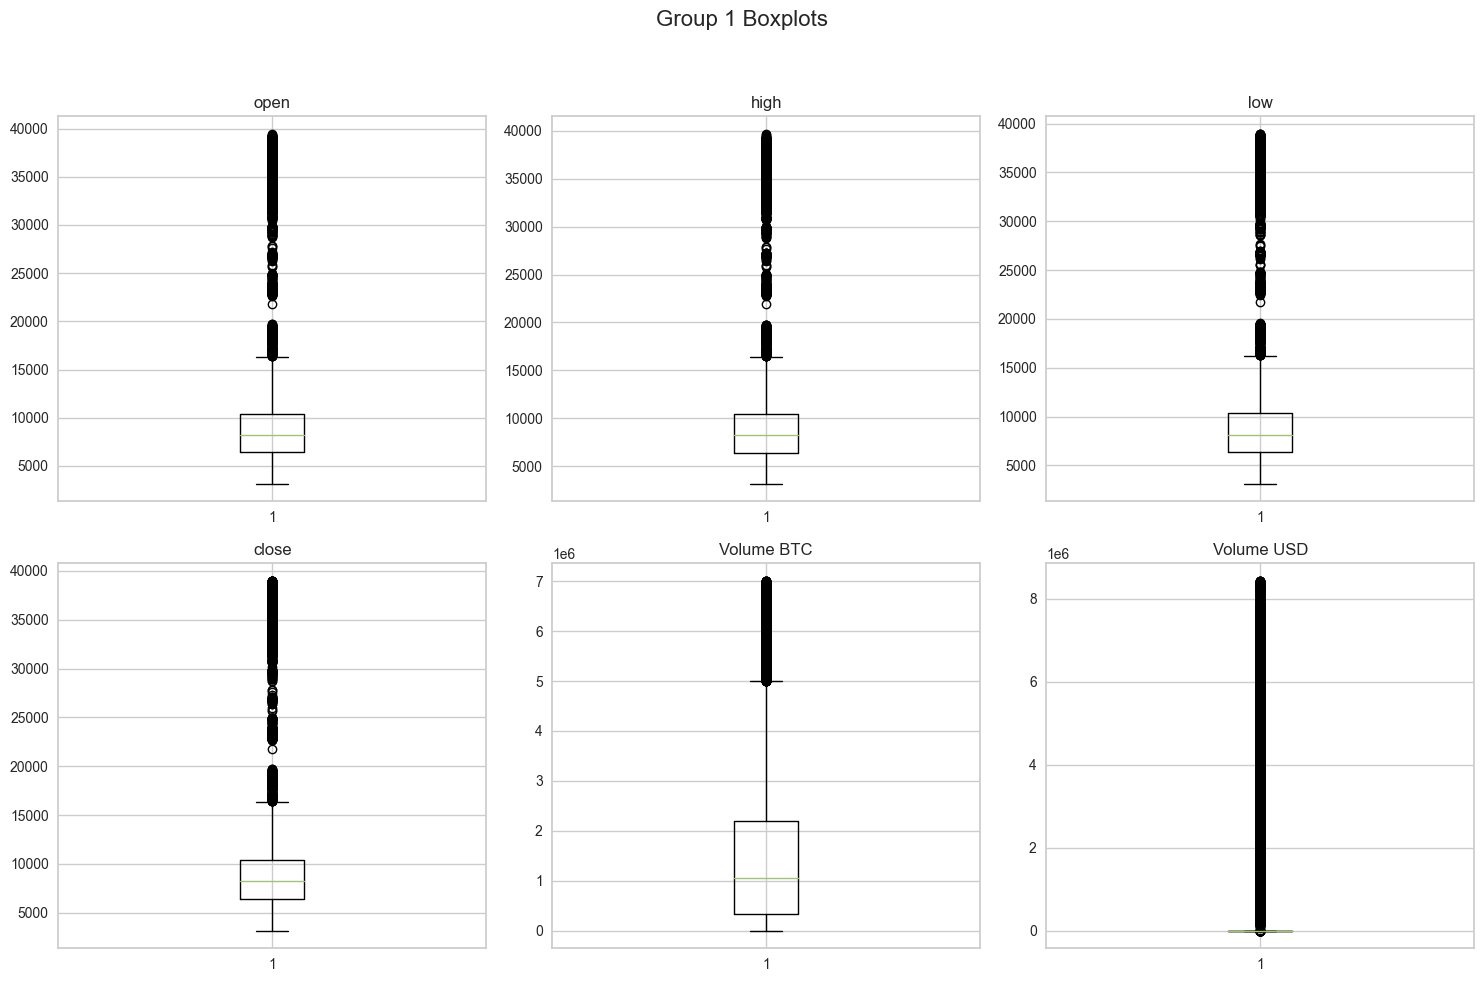

In [17]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

num_cols = len(numeric_cols)
num_plots_per_group = 9
num_groups = math.ceil(num_cols / num_plots_per_group)

for group in range(num_groups):
    cols_in_group = numeric_cols[group * num_plots_per_group:(group + 1) * num_plots_per_group]
    num_plots = len(cols_in_group)
    rows = math.ceil(num_plots / 3)
    fig, axs = plt.subplots(rows, 3, figsize=(15, 5 * rows))
    axs = axs.flatten() if num_plots > 1 else [axs]

    for i, col in enumerate(cols_in_group):
        axs[i].boxplot(df[col].dropna())
        axs[i].set_title(col)

    for i in range(num_plots, len(axs)):
        axs[i].set_visible(False)  

    plt.suptitle(f'Group {group + 1} Boxplots', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])

## <font color='#ff4d00'> Boşluk Varsa Doldurmaya, Düzeltilecek Kısım Varsa Düzeltmeye Başladık - If there is a gap, we started to fill it and if there is a part to be corrected, we started to correct it.

In [18]:
df.columns = df.columns.str.replace(r'[\s\.]', '_', regex=True)
df.head(1)

,date,open,high,low,close,Volume_BTC,Volume_USD
11,2022-02-28 13:00:00,38258.03,38365.84,37914.32,38056.2,120.015812,4.567346e+06


In [19]:
#for column in df.columns:
    # TR = Verideki her bir sütun için döngü başlatılıyor  
    # EN = Loops through each column in the dataframe

#    print(f"\nSütun: {column}")  
    # TR = Sütun ismi ekrana yazdırılıyor  
    # EN = Prints the column name

#    unique = df[column].dropna().unique()  
    # TR = NaN değerleri düşürerek benzersiz değerler elde ediliyor  
    # EN = Gets the unique values after dropping NaN values

#    if pd.api.types.is_numeric_dtype(df[column]):  
        # TR = Eğer sütundaki değerler sayısal ise, değerler sıralanıyor  
        # EN = If the column is of numeric type, the unique values are sorted
#        unique = sorted(unique)
        
#    nunique = len(unique)  # Benzersiz değerlerin sayısını hesapla
    # TR = Benzersiz değerlerin sayısını hesaplar  
    # EN = Calculates the number of unique values

#    print(f"Nunique Değerler: {nunique}")  
    # TR = Benzersiz değerlerin sayısını ekrana yazdırır  
    # EN = Prints the number of unique values

#    print(f"Unique Değerler: {unique}")  
    # TR = Benzersiz değerler ekrana yazdırılıyor  
    # EN = Prints the unique values


In [20]:
df.isnull().sum().sort_values(ascending=False)

date          0
open          0
high          0
low           0
close         0
Volume_BTC    0
Volume_USD    0
dtype: int64

## <font color=#e0c510> Verileri Görşelleştirme - Visualizing Data me

In [21]:
int_columns = df.select_dtypes(include=['int64']).columns
# TR = İnt veri türündeki sütunları alır  
# EN = Selects columns with int data type

float_columns = df.select_dtypes(include=['float64']).columns
# TR = Float veri türündeki sütunları alır  
# EN = Selects columns with float data type

object_columns = df.select_dtypes(include=['object']).columns
# TR = Object veri türündeki sütunları alır  
# EN = Selects columns with object data type

In [22]:
#for column in df.columns:
    # TR = Verideki her bir sütun için döngü başlatılıyor  
    # EN = Loops through each column in the dataframe

#    print(f"\nSütun: {column}")  
    # TR = Sütun ismi ekrana yazdırılıyor  
    # EN = Prints the column name

#    unique = df[column].dropna().unique()  
    # TR = NaN değerleri düşürerek benzersiz değerler elde ediliyor  
    # EN = Gets the unique values after dropping NaN values

#    if pd.api.types.is_numeric_dtype(df[column]):  
        # TR = Eğer sütundaki değerler sayısal ise, değerler sıralanıyor  
        # EN = If the column is of numeric type, the unique values are sorted
#        unique = sorted(unique)
        
#    nunique = len(unique)  # Benzersiz değerlerin sayısını hesapla
    # TR = Benzersiz değerlerin sayısını hesaplar  
    # EN = Calculates the number of unique values

#    print(f"Nunique Değerler: {nunique}")  
    # TR = Benzersiz değerlerin sayısını ekrana yazdırır  
    # EN = Prints the number of unique values

#    print(f"Unique Değerler: {unique}")  
    # TR = Benzersiz değerler ekrana yazdırılıyor  
    # EN = Prints the unique values


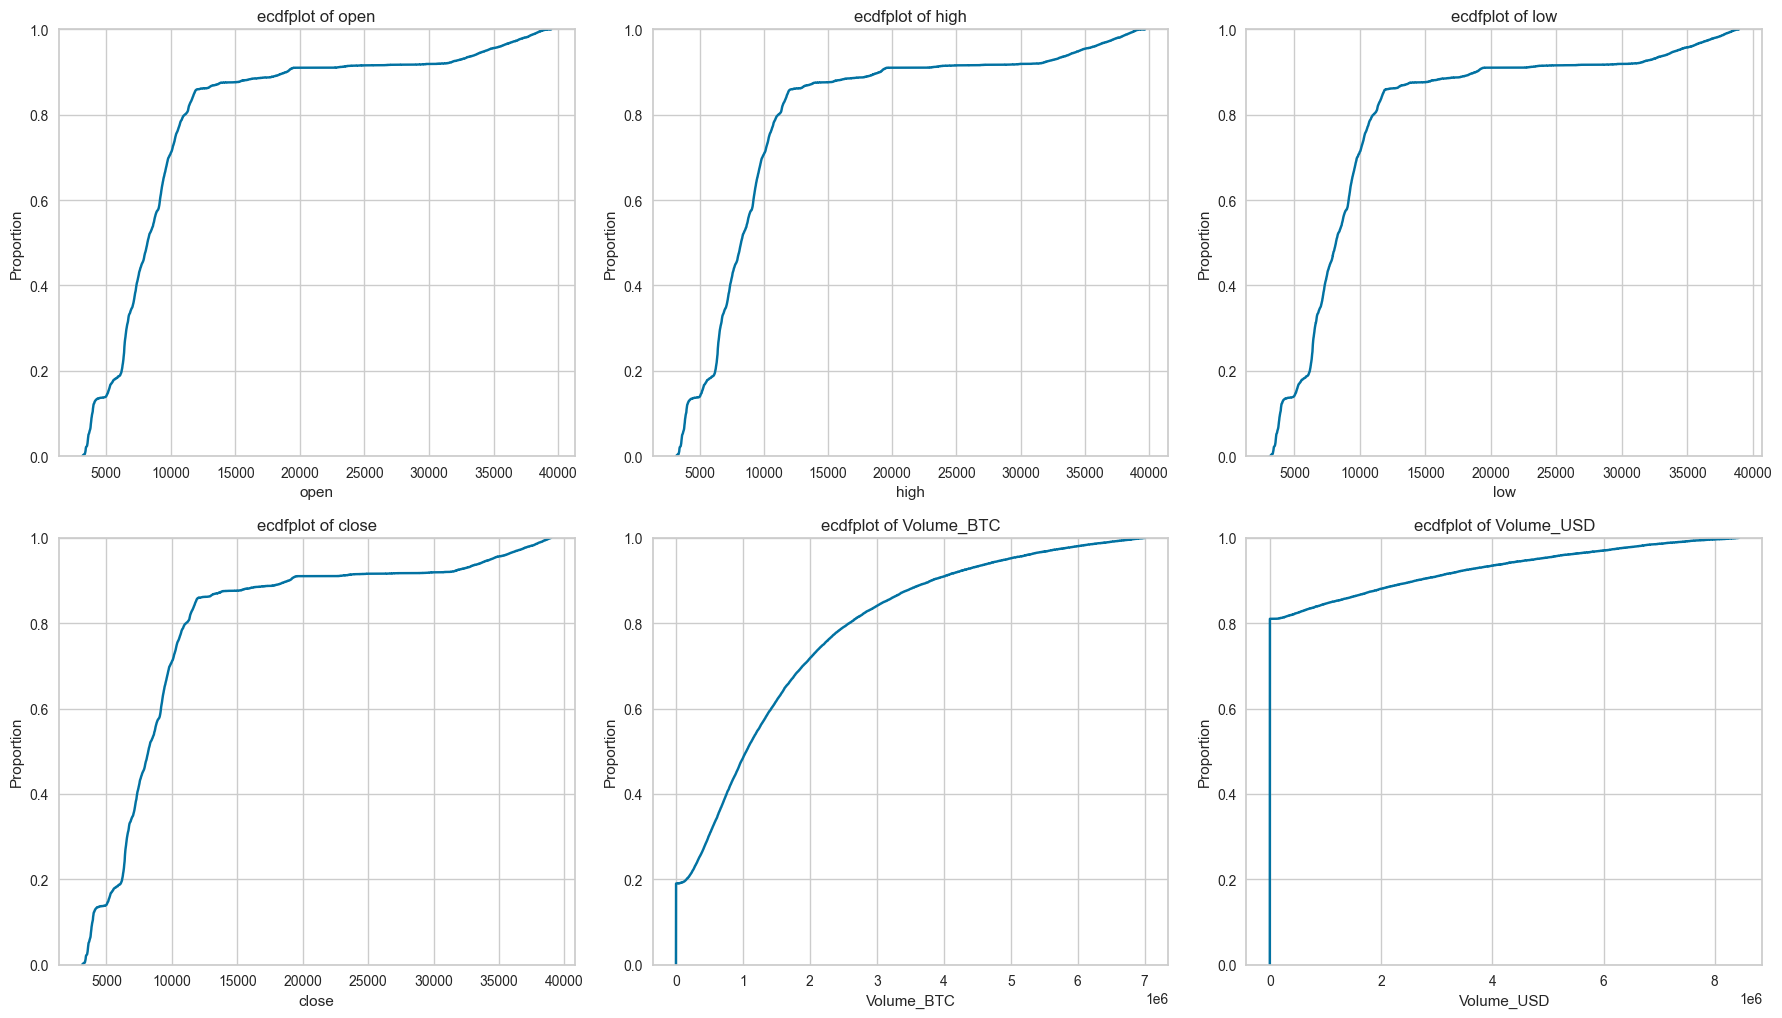

In [23]:
columns = [col for col in df.columns if col in float_columns ] 
# TR = (in df.columns) df DataFrame içindeki (col for col)her sütuna bak.
# TR = (if col in object_columns) istenilen kolonlara bakar.

# EN = (in df.columns) Look at each column in df DataFrame (col for col).
# EN = (if col in object_columns) looks at the desired columns.

num_columns = len(columns)
# TR = sütun sayısını okuyup, num_columns değişkenine atadım.
# EN = I read the number of columns and assigned it to the num_columns variable.

fig, axes = plt.subplots(nrows=(num_columns // 3) + 1, ncols=3, figsize=(18, (num_columns // 3 + 1) * 5))
# TR = nrows=(num_columns // 3) + 1: Bu, oluşturulacak alt grafiklerin (subplot'ların) satır sayısını belirler.
# TR = num_columns // 3, toplam sütun sayısının 3'e bölünmesiyle elde edilen tam sayı değerdir. + 1 ise, sütun sayısı 3'e tam bölünmüyorsa ekstra bir satır ekler.
# TR = ncols=3: Bu, her satırda kaç tane alt grafik olacağını belirler. Bu örnekte, her satırda 3 alt grafik olacak şekilde ayarlanmıştır.  
# TR = figsize=(18, (num_columns // 3 + 1) * 5): Bu, oluşturulacak figürün (grafiklerin tümünün bulunduğu büyük alanın) boyutlarını ayarlar.
# TR = figsize parametresi, genişlik ve yükseklik değerlerini (18, (num_columns // 3 + 1) * 5) şeklinde alır. 
# TR = Genişlik 18 inç, yükseklik ise her satır için 5 inç olacak şekilde hesaplanır.

# EN = nrows=(num_columns // 3) + 1: This determines the number of rows of subplots to be created.
# EN = num_columns // 3 is the integer value obtained by dividing the total number of columns by 3. + 1 adds an extra row if the column count is not perfectly divisible by 3.
# EN = ncols=3: This determines how many subplots will be in each row. In this example, there will be 3 subplots per row.
# EN = figsize=(18, (num_columns // 3 + 1) * 5): This sets the size of the figure (the large area containing all the plots).
# EN = The figsize parameter takes the width and height values as (18, (num_columns // 3 + 1) * 5).
# EN = The width is 18 inches, and the height is calculated as 5 inches per row.


for i, column in enumerate(columns):  
    row = i // 3  
    # TR = Her sütunun hangi satırda gösterileceğini hesaplar (3 sütundan birinde)  
    # EN = Calculates which row each column should be displayed in (one of three columns)

    col = i % 3  
    # TR = Her sütunun hangi sütunda gösterileceğini hesaplar (0'dan 2'ye kadar)  
    # EN = Calculates which column each plot should be placed in (from 0 to 2)

    sns.ecdfplot(data=df, x=column, ax=axes[row, col])
    # TR = Belirli bir değişkenin kümülatif dağılımını görmek için kullanılır. Bu grafikle değişkenlerin dağılımını analiz edebilirsiniz.
    # EN = It is used to see the cumulative distribution of a particular variable. With this graph you can analyze the distribution of variables.

    # TR = (data=df) Veriyi df adlı DataFrame alacak.
    # TR = (x=column) column değişkenindeki sütunları alıp yatay eksenine eşitleyecek
    # TR = (ax=axes[row, col]) Tablonun yukarıdan ve soldan kaçıncı sırada duracağını beliler

    # EN = (data=df) Will take the data from the DataFrame named df.
    # EN = (x=column) Will take the columns in the column variable and assign them to the x-axi
    # EN = (ax=axes[row, col]) Specifies the position in the grid, indicating which row and column it will be placed in.


    axes[row, col].set_title(f'ecdfplot of {column}')  
    # TR = Grafiğin başlığını, ilgili sütun adı ile ayarlar  
    # EN = Sets the title of the plot to the name of the column

    axs = axs.flatten() if num_plots > 1 else [axs]  
    # TR = Grafik pencerelerini düzleştirir (eğer tek değilse)  
    # EN = Flattens the plot axes (if there’s more than one)


for j in range(i+1, len(axes.flat)):  
    # TR = Kullanılmayan alt grafikler (subplots) siliniyor  
    # EN = Removing unused subplots

    fig.delaxes(axes.flat[j])  
    # TR = Belirtilen alt grafiği (subplot) siler  
    # EN = Deletes the specified subplot from the figure

plt.tight_layout()  
# TR = Grafiklerin düzenli görünmesi için yerleşim ayarlarını yapar  
# EN = Adjusts the layout for a tidy appearance

plt.show()  
# TR = Grafiği ekranda gösterir  
# EN = Displays the plot on the screen

## <font color='#0F52BA'> Öznitelik Mühendisliği - Feature Engineering

### <font color=#007fff> Model - Modelling 

In [24]:
x = df[["open","high","low","close","Volume_BTC","Volume_USD"]]  # Veri setinden belirli sütunları seçeriz.

In [25]:
scaler = StandardScaler()  # Veriyi standartlaştırmak için ölçekleyici oluştururuz.
x = scaler.fit_transform(x)  # Veriyi ölçeklendiririz.

In [26]:
model = Sequential()  
# TR = Modeli oluşturmak için sıralı bir model tanımlanıyor  
# EN = A sequential model is defined to create the model

model.add(Dense(30, activation='relu', input_shape=(x.shape[1],)))  
# TR = İlk katman olarak 30 nöronlu ve 'relu' aktivasyonlu yoğun bir katman ekleniyor  
# EN = Adds a dense layer with 30 neurons and 'relu' activation as the first layer

model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  
# TR = Çıktı katmanı olarak girdi boyutuna eşit nöronlu ve 'sigmoid' aktivasyonlu yoğun bir katman ekleniyor  
# EN = Adds a dense output layer with neurons equal to input dimension and 'sigmoid' activation

model.compile(optimizer='adam', loss='mean_squared_error')  
# TR = Model 'adam' optimizasyon yöntemi ve 'mean_squared_error' kayıp fonksiyonu ile derleniyor  
# EN = Compiles the model with 'adam' optimizer and 'mean_squared_error' loss function

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)  
# TR = Erken durdurma, 'val_loss' izlenerek 10 epoch sabit kalırsa eğitim durdurulacak şekilde ayarlanıyor  
# EN = Early stopping is configured to stop training if 'val_loss' doesn't improve for 10 epochs

history=model.fit(x, x, epochs=100, batch_size=32, shuffle=True, validation_split=0.2, callbacks=[early_stopping])  
# TR = Model, verinin %20'si doğrulama için ayrılarak, 100 epoch boyunca, 32'lik mini-batch'ler kullanılarak eğitiliyor  
# EN = Trains the model for 100 epochs using mini-batches of 32, with 20% of the data used for validation

Epoch 1/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5591 - val_loss: 0.1464
Epoch 2/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4867 - val_loss: 0.1463
Epoch 3/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4951 - val_loss: 0.1463
Epoch 4/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4845 - val_loss: 0.1463
Epoch 5/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.4911 - val_loss: 0.1463
Epoch 6/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4895 - val_loss: 0.1463
Epoch 7/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4900 - val_loss: 0.1463
Epoch 8/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4916 - val_loss: 0.1463
Epoch 9/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4877 - val_loss: 0.1463
Epoch 10/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4972 - val_loss: 0.1463
Epoch 11/100
574/574 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4814 - val_loss: 0.1463
Epoch 12/100
574/574 ━━━━━━━━━━━━━━━━━━━━

In [27]:
KM = KMeans(5)  
# TR = 5 kümeye ayırmak için KMeans kümeleme modeli oluşturuluyor  
# EN = A KMeans clustering model is created to divide the data into 5 clusters

KM.fit(x)  
# TR = Model, veriyi 5 kümeye ayırmak için eğitiliyor  
# EN = The model is trained to divide the data into 5 clusters

KMeans(n_clusters=5)

In [28]:
pred = KM.fit_predict(x) 
# TR = modeli x_test ile predict özelliği ile tahmin ettik. predict=tahmin demek. Dahmin edip pred eşitledik. 
# EN = We predicted the model with x_test and the predict feature. predict=means prediction. We guessed and equalized the pred.
pred

array([1, 1, 1, ..., 2, 2, 0])

In [29]:
df['Cluster'] = pred  
# TR = Tahmin edilen küme etiketleri 'Cluster' adlı yeni bir sütun olarak veri çerçevesine ekleniyor  
# EN = The predicted cluster labels are added as a new column named 'Cluster' in the dataframe

print(df.head())  
# TR = Veri çerçevesinin ilk 5 satırı ekrana yazdırılıyor  
# EN = The first 5 rows of the dataframe are printed

                   date      open      high       low     close  Volume_BTC  \
11  2022-02-28 13:00:00  38258.03  38365.84  37914.32  38056.20  120.015812   
12  2022-02-28 12:00:00  38365.56  38669.43  38197.52  38271.13  110.749247   
13  2022-02-28 11:00:00  38407.79  38505.31  38146.67  38367.53   78.152129   
14  2022-02-28 10:00:00  38114.28  38474.51  38104.13  38404.20   80.171871   
15  2022-02-28 09:00:00  38345.77  38592.84  38114.65  38125.95  112.331332   

      Volume_USD  Cluster  
11  4.567346e+06        1  
12  4.238499e+06        1  
13  2.998504e+06        1  
14  3.078937e+06        1  
15  4.282739e+06        1  


In [30]:
silhouette_score(x, pred)
# TR = silhouette_score her bir örneğin kendi kümesi içindeki diğer örneklere olan benzerliğini, diğer kümelerdeki örneklere olan benzerliğine kıyasla ölçer.
# EN = silhouette_score measures the similarity of each sample to other samples within its cluster compared to its similarity to samples in other clusters.

MemoryError: Unable to allocate 1.00 GiB for an array with shape (5850, 22942) and data type float64

In [ ]:
from mpl_toolkits.mplot3d import Axes3D  
# TR = 3D grafikler oluşturmak için gereken araçlar içe aktarılıyor  
# EN = Imports tools needed for creating 3D plots

colors = df['Volume_USD']  
# TR = Verideki 'Volume USD' sütunu renkler olarak kullanılmak üzere atanıyor  
# EN = Assigns the 'Volume USD' column from the data to be used as colors

fig = plt.figure(figsize=(12, 12))  
# TR = 12x12 boyutlarında bir figür (grafik alanı) oluşturuluyor  
# EN = Creates a figure (plot area) with a size of 12x12

ax = fig.add_subplot(111, projection='3d')  
# TR = 3D bir grafik ekseni ekleniyor  
# EN = Adds a 3D plot axis

a = df['high']  
# TR = 'high' sütunu x ekseni verisi olarak atanıyor  
# EN = Assigns the 'high' column as the x-axis data

y = df['low']  
# TR = 'low' sütunu y ekseni verisi olarak atanıyor  
# EN = Assigns the 'low' column as the y-axis data

z = df['Volume_BTC']  
# TR = 'Volume BTC' sütunu z ekseni verisi olarak atanıyor  
# EN = Assigns the 'Volume BTC' column as the z-axis data

scatter = ax.scatter(a, y, z, c=colors, cmap='viridis')  
# TR = 'viridis' renk haritası kullanılarak 3D bir dağılım grafiği çiziliyor  
# EN = Plots a 3D scatter plot using the 'viridis' colormap

colorbar = plt.colorbar(scatter, ax=ax)  
# TR = Grafik için bir renk skalası ekleniyor  
# EN = Adds a colorbar to the plot

colorbar.set_label('Volume_USD', fontsize=12, color='black')  
# TR = Renk skalasına 'Volume USD' etiketi ekleniyor  
# EN = Labels the colorbar with 'Volume USD'

ax.set_xlabel('high', color='black', fontsize=12)  
# TR = x eksenine 'high' etiketi ekleniyor  
# EN = Labels the x-axis with 'high'

ax.set_ylabel('low', color='black', fontsize=12)  
# TR = y eksenine 'low' etiketi ekleniyor  
# EN = Labels the y-axis with 'low'

ax.set_zlabel('Volume_BTC', color='black', fontsize=12)  
# TR = z eksenine 'Volume BTC' etiketi ekleniyor  
# EN = Labels the z-axis with 'Volume BTC'

plt.title('3D Renkli Noktalarla Dağılım Grafiği/Scatter Plot with 3D Colored Dots', fontsize=12, color='black')  
# TR = Grafik başlığı ekleniyor  
# EN = Adds a title to the plot

plt.show()  
# TR = Grafik ekranda gösteriliyor  
# EN = Displays the plot

In [ ]:
wcss=[]  
# TR = WCSS (Within-Cluster Sum of Squares) değerlerini saklamak için boş bir liste oluşturuluyor  
# EN = Creates an empty list to store WCSS (Within-Cluster Sum of Squares) values

ss=[]  
# TR = Silhouette skoru değerlerini saklamak için boş bir liste oluşturuluyor  
# EN = Creates an empty list to store Silhouette score values

for i in range(2,10):  
# TR = 2 ile 9 arasında döngü oluşturuluyor (kümelerin sayısını belirlemek için)  
# EN = Loops through numbers from 2 to 9 (for determining the number of clusters)

    model=KMeans(i)  
    # TR = i sayısında kümeleri olan bir KMeans modeli oluşturuluyor  
    # EN = Creates a KMeans model with i clusters

    model=model.fit(x)  
    # TR = Model, veriler üzerinde eğitiliyor  
    # EN = Fits the model on the data

    pred=model.predict(x)  
    # TR = Verilere göre tahminler yapılıyor (küme etiketleri)  
    # EN = Makes predictions on the data (cluster labels)

    ss1=silhouette_score(x,pred)  
    # TR = Silhouette skoru hesaplanıyor  
    # EN = Calculates the Silhouette score

    ss.append(ss1)  
    # TR = Hesaplanan Silhouette skoru 'ss' listesine ekleniyor  
    # EN = Appends the calculated Silhouette score to the 'ss' list

    print(ss1)  
    # TR = Hesaplanan Silhouette skoru ekrana yazdırılıyor  
    # EN = Prints the calculated Silhouette score

    wcss.append(model.inertia_)  
    # TR = Modelin WCSS değeri 'wcss' listesine ekleniyor  
    # EN = Appends the model's WCSS value to the 'wcss' list


In [ ]:
plt.plot(range(2,10),wcss);
# TR = Hemen Yukarıdaki satırda yapılan kodun tablosu.
# EN = Table of the code made in the line just above.

In [ ]:
vis=KElbowVisualizer(model,k=(2,10))
# TR = Bu yöntem, özellikle k-means gibi kümeleme algoritmalarında en uygun küme sayısını belirlemek için oldukça faydalıdır.
# EN = This method is especially useful for determining the optimal number of clusters in clustering algorithms such as k-means.
vis.fit(x)
vis.show();

### <font color=#0fffff> Hiyerarşik kümeleme - Hierarchical Clustering

In [ ]:
data=linkage(x,method='ward', metric='euclidean')

In [ ]:
plt.figure(figsize=(25,6))
dendrogram(data);

In [ ]:
x=df[['Volume_USD','Cluster']]

In [ ]:
ax=sns.countplot(data=x,x='Cluster')
ax.bar_label(ax.containers[0]);

In [ ]:
cols = list(x.columns)  
# TR = Veri çerçevesindeki sütun adlarını listeye alıyor  
# EN = Converts the column names of the dataframe to a list

cols.insert(0, cols.pop(cols.index('Cluster')))  
# TR = 'Cluster' sütununu listenin başına taşıyor  
# EN = Moves the 'Cluster' column to the beginning of the list

x = x[cols]  
# TR = Veri çerçevesinin sütun sıralamasını güncelliyor  
# EN = Updates the column order of the dataframe


In [ ]:
x[x['Cluster']==0]
# TR = vis'de çıkan sonuca göre oluşturacağız.
# EN = We will create it according to the result in vis.

In [ ]:
x[x['Cluster']==1]

In [ ]:
x[x['Cluster']==2]

In [ ]:
x[x['Cluster']==3]

In [ ]:
x[x['Cluster']==4]

In [ ]:
pickle.dump(model,open('ML.pkl','wb'))